In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploring the Data

In [9]:
# First, I'm just going to get a sense of the  data I'm working with here. 

first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1605b3bac80>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [10]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1605b3b9c90>,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [11]:
for row in session.query(Measurement.id, Measurement.station, Measurement.prcp, Measurement.date, Measurement.tobs).limit(10).all():
    print(row)

(1, 'USC00519397', 0.08, '2010-01-01', 65.0)
(2, 'USC00519397', 0.0, '2010-01-02', 63.0)
(3, 'USC00519397', 0.0, '2010-01-03', 74.0)
(4, 'USC00519397', 0.0, '2010-01-04', 76.0)
(5, 'USC00519397', None, '2010-01-06', 73.0)
(6, 'USC00519397', 0.06, '2010-01-07', 70.0)
(7, 'USC00519397', 0.0, '2010-01-08', 64.0)
(8, 'USC00519397', 0.0, '2010-01-09', 68.0)
(9, 'USC00519397', 0.0, '2010-01-10', 73.0)
(10, 'USC00519397', 0.01, '2010-01-11', 64.0)


In [12]:
for row in session.query(Station.station, Station.name, Station.longitude, Station.id, Station.latitude, Station.elevation):
    print(row)
    

('USC00519397', 'WAIKIKI 717.2, HI US', -157.8168, 1, 21.2716, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', -157.8015, 2, 21.4234, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374, 3, 21.5213, 7.0)
('USC00517948', 'PEARL CITY, HI US', -157.9751, 4, 21.3934, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', -158.0111, 5, 21.4992, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', -157.71139, 6, 21.33556, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', -157.84888999999998, 7, 21.45167, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', -157.9992, 8, 21.3152, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', -157.8025, 9, 21.3331, 152.4)


In [13]:
count_measurement = session.query(Measurement).count()
count_measurement

19550

In [14]:
count_station = session.query(Station).count()
count_station

9

# Exploratory Precipitation Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_rec_date = session.query(func.max(Measurement.date)).first()
most_rec_date

# An alternative to the above.
# latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# latest_date

('2017-08-23',)

In [18]:
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [63]:
# Perform a query to retrieve the date and precipitation scores

# GREATER THAN THE DATE ONE YEAR AGO... (2016, X, X)

last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()


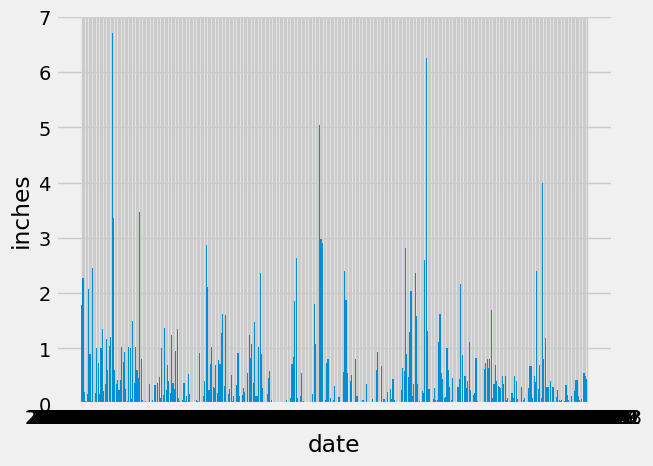

In [66]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(last_year_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df['date'], df['precipitation'])

plt.xlabel('date')
plt.ylabel('inches')

# plt.tight_layout()

plt.show()


# NEED TO KEEP TINKERING WITH THIS. 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2230 non-null   object 
 1   precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data

df['precipitation'].describe()

# HOW DO I MAKE THIS A DATAFRAME? NEEDED? 

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(Measurement).group_by(Measurement.station).count()
number_stations

9

In [ ]:
# I'm not sure the above is right -- let's come back and try that again.

In [70]:
# Need to get it ordered by the descending count instead...

station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.



In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

most_active_calcs = session.query(*sel).filter(Measurement.station == "USC00519281").all()
print(most_active_calcs)


[(54.0, 85.0, 71.66378066378067)]


In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# First, need to find the most recent date for that station. 
rec_date_most_active = session.query(func.max(Measurement.date)).filter(Measurement.station == "USC00519281").first()
rec_date_most_active

('2017-08-18',)

In [89]:
# Then, need to query the last 12 months of TOBS data for that same station. 

last_year_data_most_active = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-18').all()
last_year_data_most_active

[('2016-08-18', 80.0),
 ('2016-08-19', 77.0),
 ('2016-08-20', 80.0),
 ('2016-08-21', 76.0),
 ('2016-08-22', 77.0),
 ('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-

TypeError: list.count() takes exactly one argument (0 given)

In [90]:
# Then plot as a histogram. 
df_tobs = pd.DataFrame(last_year_data_most_active, columns=['date', 'precipitation'])
df_tobs


,date,precipitation
0,2016-08-18,80.0
1,2016-08-19,77.0
2,2016-08-20,80.0
3,2016-08-21,76.0
4,2016-08-22,77.0
...,...,...
2256,2017-08-19,71.0
2257,2017-08-20,78.0
2258,2017-08-21,76.0
2259,2017-08-22,76.0


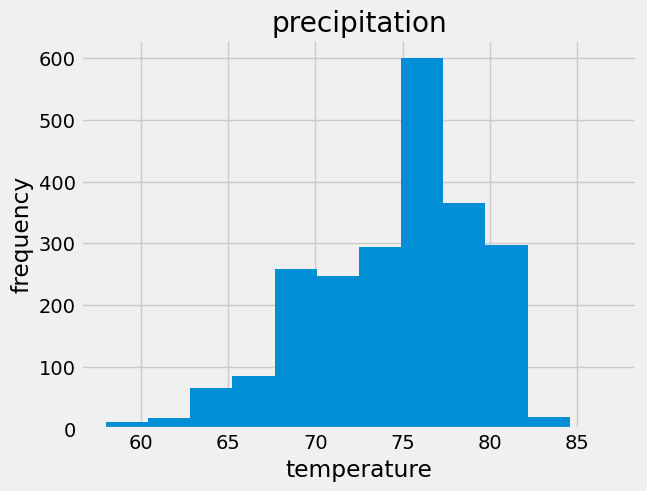

In [96]:
df_tobs.hist(column='precipitation', bins=12)


plt.xlabel('temperature')
plt.ylabel('frequency')

plt.show()


# I THINK THIS IS SUMMING ALL THE TEMP DATA (VERSUS JUST COUNTING IT). HOW DO I ADJUST? 

# Close Session

In [ ]:
# Close Session
session.close()